# Exercice 1

In [12]:
import numpy as np
from random import *
import time
import matplotlib.pyplot as plt

## Question 1.a
On va considérer des arrays 2D pour représenter la matrice d'adjacence. Ainsi pour un graph à N noeuds, la matrice d'adjacence sera de taille NxN, et chaque valeur à la coordonnée (x,y) représente le nombre d'arêtes entre les noeuds x et y. Les graphes étant non orientés; cette matrice est donc symétrique.
Voici un éxemple de définition suivant cette structure :
```
                 # x1 x2 x3 x4 x5 x6
                 
Graph = np.array([[0, 1, 0, 0, 0, 0],     # y1
                  [1, 0, 1, 0, 1, 0],     # y2
                  [0, 1, 0, 1, 1, 0],     # y3
                  [0, 0, 1, 0, 0, 1],     # y4
                  [0, 1, 1, 0, 0, 1],     # y5
                  [0, 0, 0, 1, 1, 0]])    # y6
```

Pour effectuer la constraction de deux sommets, on va considerer que l'on en isole un (par exmple y) et on ajoute tous les liens du noeud isolé au noeud restant (par exemple x).

In [2]:
def contraction(G, e):
    # récupération des indice des deux sommets à fusionner
    x,y = e
        
    # récupération du nombre d'arêtes entre y et chaque autre sommet
    fus_l = G[y,:]

    # on met à jour le sommet x en ajoutant les relations de y
    G[x,:] += fus_l
    G[:,x] += fus_l
    
    # on ne considère pas les arête auto-référentes
    G[x,x] = 0
    
    # on "isole" le sommet y en mettant ses lignes et colonnes correspondantes à 0
    G[y,:] = np.zeros(len(G))
    G[:,y] = np.zeros(len(G))
    
    # on renvoie le nouveau graph ainsi que le sommet isolé
    return G


## Question 1.b

### Graphes Complets

In [3]:
tps_complet = []
N = [100,150,200,250,500,1000,1500,2000]

for n in N:
    tps_N = []
    # tirage aléatoire de 2 sommets à fusionner
    # toutes les instances de graph pour ce n fusionnerons les deux mêmes sommets
    e = (np.random.randint(n),np.random.randint(n))
    
    for i in range(1000):
        # création de la matrice d'un graph complet de taille n
        G = np.ones((n,n))
        G = G - np.eye(n)
        
        # Calcul du temps d'execution
        debut = time.time()
        G = contraction(G,e)
        fin = time.time()
        
        # stockage des temps d'exécution pour ce n
        tps_N.append(fin-debut)
    
    # stockage de la moyenne des temps d'exécution pour chaque n
    tps_complet.append(np.mean(tps_N))


### Graphes à Cycles

In [23]:
tps_cycle = []
N = [100,150,200,250,500,1000,1500,2000]

for n in N:
    tps_N = []
    # tirage aléatoire de 2 sommets à fusionner
    # toutes les instances de graph pour ce n fusionnerons les deux mêmes sommets
    e = (np.random.randint(n),np.random.randint(n))
    
    for i in range(1000):
        # création de la matrice d'un graph à cycle de taille n
        G = np.zeros((n,n))
        np.fill_diagonal(G[:,1:], 1)
        np.fill_diagonal(G[1:,:], 1)
        G[-1,0] = 1
        G[0,-1] = 1
        
        # Calcul du temps d'execution
        debut = time.time()
        G = contraction(G,e)
        fin = time.time()
        
        # stockage des temps d'exécution pour ce n
        tps_N.append(fin-debut)
    
    # stockage de la moyenne des temps d'exécution pour chaque n
    tps_cycle.append(np.mean(tps_N))


### Graphes construits par Proba

In [5]:
tps_proba = []
N = [100,150,200,250,500,1000,1500,2000]

for n in N:
    tps_N = []
    # tirage aléatoire de 2 sommets à fusionner
    # toutes les instances de graph pour ce n fusionnerons les deux mêmes sommets
    e = (np.random.randint(n),np.random.randint(n))
    
    for i in range(1000):
        # création de la matrice du graph aléatoire
        G = np.random.randint(2, size = (n,n))
        
        # Calcul du temps d'execution
        debut = time.time()
        G = contraction(G,e)
        fin = time.time()
        
        # stockage des temps d'exécution pour ce n
        tps_N.append(fin-debut)
    
    # stockage de la moyenne des temps d'exécution pour chaque n
    tps_proba.append(np.mean(tps_N))


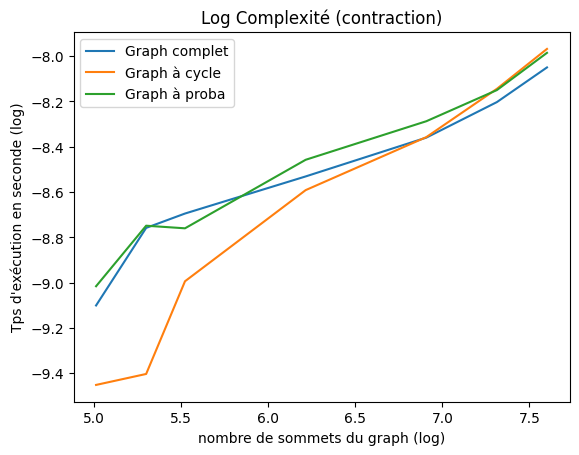

In [24]:
# Visualisation plus pratique
plt.figure()
plt.title('Log Complexité (contraction)')
plt.xlabel('nombre de sommets du graph (log)')
plt.ylabel('Tps d\'exécution en seconde (log)')
plt.plot(np.log(N[1:]), np.log(tps_complet[1:]), label='Graph complet')
plt.plot(np.log(N[1:]), np.log(tps_cycle[1:]), label='Graph à cycle')
plt.plot(np.log(N[1:]), np.log(tps_proba[1:]), label='Graph à proba')
plt.legend()
plt.show()

### Analyse

Pour les petites tailles de graphes, le cycle est clairement plus rapide.

Sur des tailles plus grandes, les temps d'exécutions se rapprochent et s'équilibrent.

## Question 1.c

Nous cherchons tirer aléatoirement une arête parmi toutes celles existance dans notre graphe. Une idée pour nous permettre de le faire serait de définir les probabilités de tirer un sommet précis en connaissant le nombre d'arête relié à chacun. Nous pourrions ainsi pondérer la probabilité de tirer un couple de sommet.

Nous allons pour cela sommer sur les lignes (ou les colonnes) les valeurs de la matrice d'adjacence. Nous avons ainsi un vecteur stockant le nombre d'arêtes partant de chaque sommet. Pour obtenir une probabilité, nous devons normaliser en divisant par la somme du nombre d'arêtes, divisée par deux (graph non orienté).

Le graphe étant non orienté et la matrice d'adjacence étant symétrique, l'axe sur lequel nous effectuons l'opération n'a pas de réelle importance.

In [26]:
def selectRandom(G):
    n = len(G)
    # calcul de la proba de choisir un arc relié à un certain sommet
    proba = ( np.sum(G, axis = 0)/(np.sum(G)) )
    
    # tirage aléatoire du premier sommet
    x = np.random.choice(n, p=proba)
    # tirage du second sommet parmi les possibilités depuis le premier sommet
    y = np.random.choice(n, p=G[x]/np.sum(G[x]))
                
    return x,y

In [27]:
def karger(G):
    V = [*range(len(G))]
    v1 = set()
    v2 = set()

    # première itération pout initialiser v1
    x,y = selectRandom(G)
    G = contraction(G, (x,y))
    v1.update([x,y])
    V.remove(y)

    # boucle
    while len(V) > 2:
        x,y = selectRandom(G)
        
        G = contraction(G, (x,y))
        
        if (x in v1) or (y in v1):
            v1.update([x])
            v1.update([y])
        else:
            v2.update([x])
            v2.update([y])

        V.remove(y)

    # placement des deux noeuds restants
    if V[0] in v1:
        v2.update([V[1]])
    else:
        v2.update([V[0]])
        
    return v1, v2


In [68]:
# test
G1 = np.array([[0,1,0,0,0,0],
               [1,0,1,0,1,0],
               [0,1,0,1,1,0],
               [0,0,1,0,0,1],
               [0,1,1,0,0,1],
               [0,0,0,1,1,0]])

print(G1)
print(karger(G1))


[[0 1 0 0 0 0]
 [1 0 1 0 1 0]
 [0 1 0 1 1 0]
 [0 0 1 0 0 1]
 [0 1 1 0 0 1]
 [0 0 0 1 1 0]]
({3, 5}, {0, 1, 2, 4})


## Question 1.d

### Graphes Complets

In [47]:
tps_complet_karger = []
N = [10,20,30,50,75,100,125,150]

for n in N:
    tps_N = []
    
    for i in range(100):
        # création de la matrice d'un graph complet de taille n
        G = np.ones((n,n))
        G = G - np.eye(n)
        
        # Calcul du temps d'execution
        debut = time.time()
        S,V = karger(G)
        fin = time.time()
        
        # stockage des temps d'exécution pour ce n
        tps_N.append(fin-debut)
    
    # stockage de la moyenne des temps d'exécution pour chaque n
    tps_complet_karger.append(np.mean(tps_N))


### Graphes à Cycles

In [48]:
tps_cycle_karger = []
N = [10,20,30,50,75,100,125,150]

for n in N:
    tps_N = []
    
    for i in range(100):
        # création de la matrice d'un graph à cycle de taille n
        G = np.zeros((n,n))
        np.fill_diagonal(G[:,1:], 1)
        np.fill_diagonal(G[1:,:], 1)
        G[-1,0] = 1
        G[0,-1] = 1
        
        # Calcul du temps d'execution
        debut = time.time()
        S,V = karger(G)
        fin = time.time()
        
        # stockage des temps d'exécution pour ce n
        tps_N.append(fin-debut)
    
    # stockage de la moyenne des temps d'exécution pour chaque n
    tps_cycle_karger.append(np.mean(tps_N))


### Graphes Proba

In [51]:
tps_proba_karger = []
N = [10,20,30,50,75,100,125,150]

for n in N:
    tps_N = []
    
    for i in range(100):
        # création de la matrice du graph aléatoire
        G = np.random.randint(2, size = (n,n))
        G = np.triu(G, k=1) + np.transpose(np.triu(G, k=1))
        
        # Calcul du temps d'execution
        debut = time.time()
        S,V = karger(G)
        fin = time.time()
        
        # stockage des temps d'exécution pour ce n
        tps_N.append(fin-debut)
    
    # stockage de la moyenne des temps d'exécution pour chaque n
    tps_proba_karger.append(np.mean(tps_N))


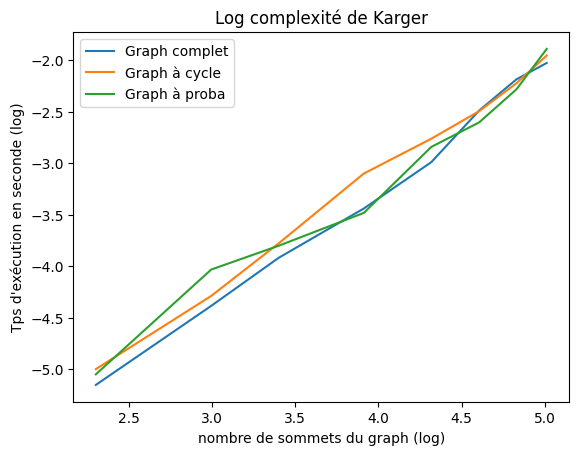

In [52]:
# Visualisation plus pratique
plt.figure()
plt.title('Log complexité de Karger')
plt.xlabel('nombre de sommets du graph (log)')
plt.ylabel('Tps d\'exécution en seconde (log)')
plt.plot(np.log(N), np.log(tps_complet_karger), label='Graph complet')
plt.plot(np.log(N), np.log(tps_cycle_karger), label='Graph à cycle')
plt.plot(np.log(N), np.log(tps_proba_karger), label='Graph à proba')
plt.legend()
plt.show()

### Analyse

Peu de différences notable par matrice d'adjacence

## Question 1.e

In [33]:
def contraction2(g, arete):
    i, j = arete  #les deux sommets de l'arête 
    noeud = i + "," + j #le nouveau sommet
    g[noeud] = [] #la liste des successeur du sommet 
    #O(n)
    for elm in g[i]:
        if elm not in i.split(',') and elm not in j.split(','):
            g[noeud].append(elm)
    #O(n)
    for elm in g[j]:
        if elm not in i.split(',') and elm not in j.split(','):
            g[noeud].append(elm)
    
    del g[i] 
    del g[j]
    return g

## Question 1.f

In [34]:
#Chaque sommet existe dans le dictionnaire exactement le nombre de fois ou elle est relier par une arête 
##On construit une liste qui est la concatination de toutes les liste du dictionaire on note LISTE
####Sa complexiter est O(n) 
## 1 - on tire un sommet aléatoir dans la liste LIST on note S 
#  2 - on tire un autre sommet aléatoir de la liste du sommet S 
def randomSommet(g):
    liste = []
    #O(n)
    for elm in g.keys():
        liste += list(g[elm])
    
    i = randint(0, len(liste)-1)
    s1 = liste[i]
    s2 = -1
    if s1 in g:
        i = randint(0, len(g[s1])-1)
        s2 = g[s1][i]
    else:
        l = list(g.keys())
        #O(n)
        for elm in l:
            e = elm.split(',')
            if s1 in e:
                i = randint(0, len(g[elm]) - 1)
                s1 = elm
                s2 = g[elm][i]
                break
    
    l = list(g.keys())    
    if s2 not in g:
        #O(n)
        for elm in l:
            e = elm.split(',')
            if s2 in e:
                s2 = elm
                break
    return (s1, s2)

## Question 1.g

In [38]:
def karger2(g):
    while len(g.keys()) > 2:
        arete = randomSommet(g)
        g = contraction2(g, arete) 
    return g

# Analyse

## Question 1.h

### Graphes Complets

In [53]:
def grapheComplet(taille):
    g = dict()
    #la liste de tous les sommets 
    liste = []
    i = 1
    while i <= taille:
        liste.append(str(i))
        i += 1
    
    i = 1
    while i <= taille:
        liste1 = liste.copy()
        liste1.remove(str(i))
        g[str(i)] = liste1 
        i += 1
    return g

# test
tps_complet_karger2 = []
N = [10,20,30,50,75,100,125,150]

for n in N:
    tps_N = []
    
    for i in range(100):
        # création de la matrice d'un graph complet de taille n
        G = grapheComplet(n)
        
        # Calcul du temps d'execution
        debut = time.time()
        g = karger2(G)
        fin = time.time()
        
        # stockage des temps d'exécution pour ce n
        tps_N.append(fin-debut)
    
    # stockage de la moyenne des temps d'exécution pour chaque n
    tps_complet_karger2.append(np.mean(tps_N))


### Graphes à Cycles

In [54]:
def grapheCycle(taille):
    g = dict()
    i = 1 
    while i < taille:
        g[str(i)] = [str(i+1)]
        i += 1
    g[str(taille)] = [str(1)]
    i = taille
    while i > 1:
        g[str(i)].append(str(i-1))
        i -= 1
    g['1'].append(str(taille))
    return g

tps_cycle_karger2 = []
N = [10,20,30,50,75,100,125,150]

for n in N:
    tps_N = []
    
    for i in range(100):
        # création de la matrice d'un graph complet de taille n
        G = grapheCycle(n)
        
        # Calcul du temps d'execution
        debut = time.time()
        g = karger2(G)
        fin = time.time()
        
        # stockage des temps d'exécution pour ce n
        tps_N.append(fin-debut)
    
    # stockage de la moyenne des temps d'exécution pour chaque n
    tps_cycle_karger2.append(np.mean(tps_N))

### Graphes Bipartie Complets

In [43]:
def grapheBipartieComplet(taille): #taille doit être multiple de 2 sinon on prend taille+1 ; E1 = {sommet1, ..., sommetTaille/2}
                            #et E1 = {sommet_Taille/2+1, ..., sommetTaille}
    g = dict()
    
    if(taille %2 != 0):
        taille += 1
    listeSommetE1 = []
    i = 1
    while i <= taille/2:
        listeSommetE1.append(str(i))
        i += 1
    listeSommetE2 = []
    while i <= taille:
        listeSommetE2.append(str(i))
        i += 1
    
    i = 1
    while i <= taille/2:
        g[str(i)] = listeSommetE2
        i += 1
    while i <= taille:
        g[str(i)] = listeSommetE1
        i += 1
    return g

tps_biparti_karger2 = []
N = [10,20,30,50,75,100,125,150]

for n in N:
    tps_N = []
    
    for i in range(100):
        # création de la matrice d'un graph complet de taille n
        G = grapheBipartieComplet(n)
        
        # Calcul du temps d'execution
        debut = time.time()
        g = karger2(G)
        fin = time.time()
        
        # stockage des temps d'exécution pour ce n
        tps_N.append(fin-debut)
    
    # stockage de la moyenne des temps d'exécution pour chaque n
    tps_biparti_karger2.append(np.mean(tps_N))

### Graphes Aléatoires

In [55]:
def grapheAleatoire(taille):
    g = dict()
    i = 1
    while i < taille:
        if str(i) not in list(g.keys()):
            g[str(i)] = []
        j = i + 1
        while j <= taille:
            if randint(0,1) == 1:
                g[str(i)].append(str(j))
                if str(j) not in list(g.keys()):
                    g[str(j)] = []
                g[str(j)].append(str(i))
                    
                
            j += 1
        i += 1
        
    return g

tps_alea_karger2 = []
N = [10,20,30,50,75,100,125,150]

for n in N:
    tps_N = []
    
    for i in range(100):
        # création de la matrice d'un graph complet de taille n
        G = grapheAleatoire(n)
        
        # Calcul du temps d'execution
        debut = time.time()
        g = karger2(G)
        fin = time.time()
        
        # stockage des temps d'exécution pour ce n
        tps_N.append(fin-debut)
    
    # stockage de la moyenne des temps d'exécution pour chaque n
    tps_alea_karger2.append(np.mean(tps_N))

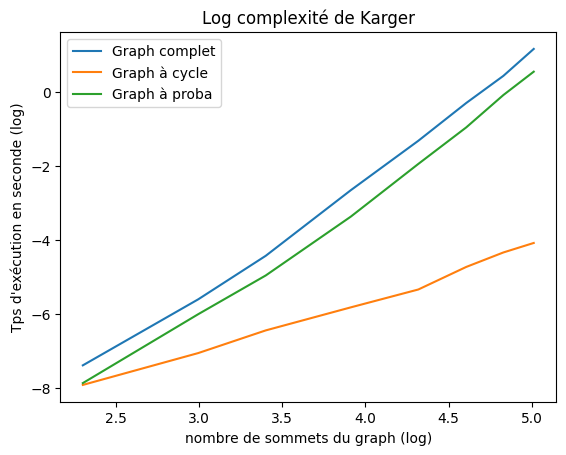

In [58]:
# Visualisation plus pratique
plt.figure()
plt.title('Log complexité de Karger')
plt.xlabel('nombre de sommets du graph (log)')
plt.ylabel('Tps d\'exécution en seconde (log)')
plt.plot(np.log(N), np.log(tps_complet_karger2), label='Graph complet')
plt.plot(np.log(N), np.log(tps_cycle_karger2), label='Graph à cycle')
#plt.plot(np.log(N), np.log(tps_biparti_karger2), label='Grap biparti complet')
plt.plot(np.log(N), np.log(tps_alea_karger2), label='Graph à proba')
plt.legend()
plt.show()

### Analyse

Cycle plus rapide que les autres en dictionnaire

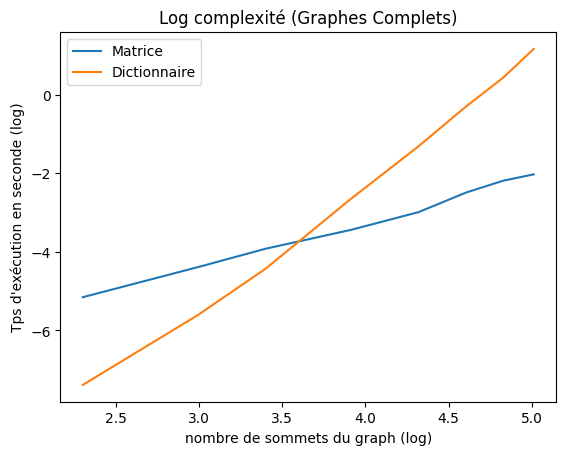

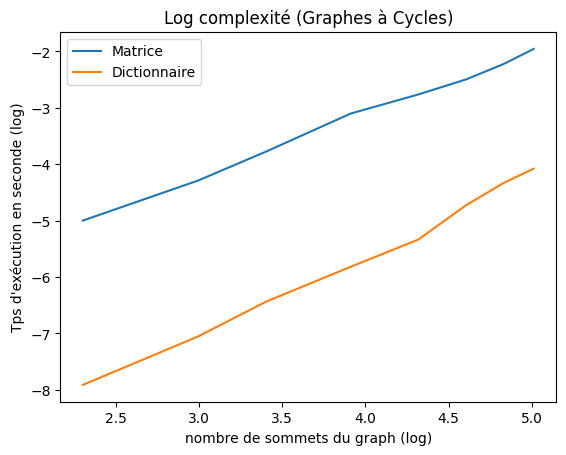

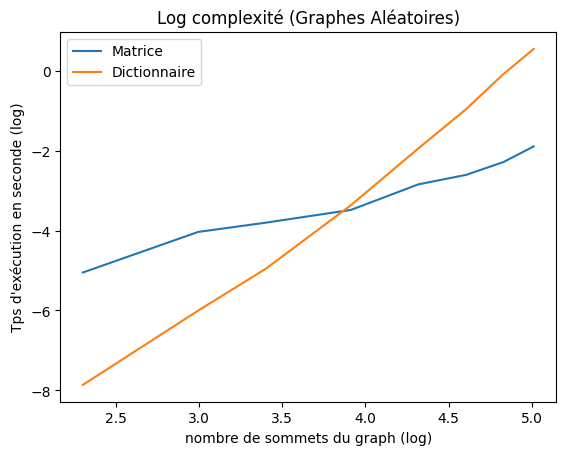

In [67]:
# Comparaison
plt.figure()
plt.title('Log complexité (Graphes Complets)')
plt.xlabel('nombre de sommets du graph (log)')
plt.ylabel('Tps d\'exécution en seconde (log)')
plt.plot(np.log(N), np.log(tps_complet_karger), label='Matrice')
plt.plot(np.log(N), np.log(tps_complet_karger2), label='Dictionnaire')
plt.legend()
plt.show()

plt.figure()
plt.title('Log complexité (Graphes à Cycles)')
plt.xlabel('nombre de sommets du graph (log)')
plt.ylabel('Tps d\'exécution en seconde (log)')
plt.plot(np.log(N), np.log(tps_cycle_karger), label='Matrice')
plt.plot(np.log(N), np.log(tps_cycle_karger2), label='Dictionnaire')
plt.legend()
plt.show()

plt.figure()
plt.title('Log complexité (Graphes Aléatoires)')
plt.xlabel('nombre de sommets du graph (log)')
plt.ylabel('Tps d\'exécution en seconde (log)')
plt.plot(np.log(N), np.log(tps_proba_karger), label='Matrice')
plt.plot(np.log(N), np.log(tps_alea_karger2), label='Dictionnaire')
plt.legend()
plt.show()

### Analyse

Sur les petits graphes (environ jusqu'à 50) les dictionnaires sont plus efficaces. Mais la matrice d'adjacence est plus efficace sur des gros graphs.

Les dictionnaires sont cependant plus rapides pour les graphes à cycles.